In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd

In [3]:
FOLDER = 'E:/diss/reuters/'
GRAPHS = 'C:/Users/Mr Barrett/Dropbox/Diss/graphs/'

In [4]:
lbltype_counts = pd.read_csv(FOLDER + "val_lblcounts.csv").set_index("lbltype_name")
lbltype_counts.sort_values("num_val", inplace=True)
lbltype_counts

,num_val
lbltype_name,
nickel,1
platinum,1
nkr,1
retail,1
housing,1
...,...
grain,68
money-fx,82
crude,99


In [5]:
df = pd.read_csv(FOLDER + "ncd_formulae_results.csv")
df

,lbltype_name,ncd_formula,compname,predictor,seqpart,seqpart_size,num_instances,tp,tn,fp,fn
0,acq,inf-dist,bzip2,AVG-LOG,0,7769,1650,1650,6119,0,0
1,acq,inf-dist,bzip2,AVG-LOG,1,1510,357,230,422,725,125
2,acq,inf-dist,bzip2,AVG-LOG,2,1509,362,237,415,721,118
3,acq,mutual-inf-esque,"bert-init_state=bert-base-uncased,comp=L2R,chu...",AVG-LOG,0,7769,1650,1650,6119,0,0
4,acq,mutual-inf-esque,"bert-init_state=bert-base-uncased,comp=L2R,chu...",AVG-LOG,1,1510,357,169,590,557,186
...,...,...,...,...,...,...,...,...,...,...,...
991,zinc,norm-inf-dist-1,gzip,3-NN,1,1510,8,4,1490,4,4
992,zinc,norm-inf-dist-1,gzip,3-NN,2,1509,5,3,1483,3,2
993,zinc,norm-inf-dist-2,bzip2,1-NN,0,7769,21,21,7748,0,0
994,zinc,norm-inf-dist-2,bzip2,1-NN,1,1510,8,4,1487,7,4


In [6]:
df["modal_acc"] = 1.0 - df["num_instances"] / df["seqpart_size"]
df["acc"] = (df["tp"] + df["tn"]) / df["seqpart_size"]
df["precision"] = df["tp"] / (df["tp"] + df["fp"])
df["recall"] = df["tp"] / (df["tp"] + df["fn"])
df["f1"] = df["tp"] / (df["tp"] + 0.5 * (df["fp"] + df["fn"]))

In [7]:
df_val = df[df["seqpart"] == 1]
df_test = df[df["seqpart"] == 2]

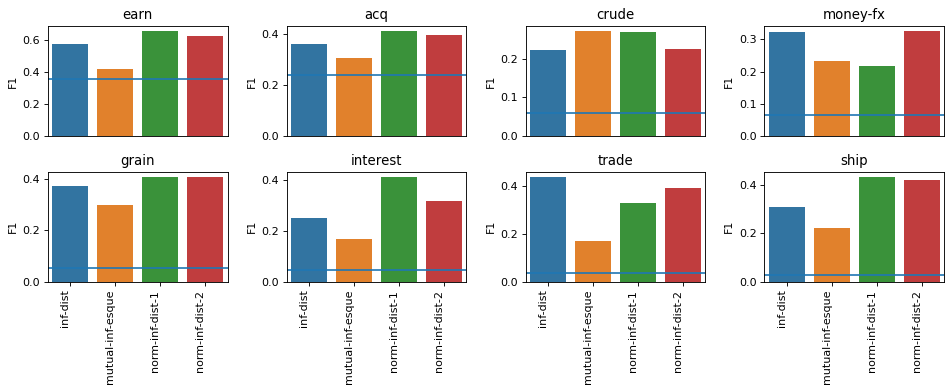

In [10]:
num = 8
row = 4
assert(num % row == 0)
lbltypes = list(lbltype_counts.index)[::-1][:num]

fig, axs = plt.subplots(num // row, row, figsize=(3 * row, 2.5 * (num // row)), dpi=80)

for i in range(num // row):
    for j, lbltype in enumerate(lbltypes[i * row : (i + 1) * row]):
        df_partition = df_test[df_test["lbltype_name"] == lbltype]
        df_partition = df_partition.sort_values(["num_instances", "ncd_formula"])
        sns.barplot(data=df_partition, ax=axs[i][j],
                    x="ncd_formula", y="f1")

        axs[i][j].set_title(lbltype)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel("F1")
        axs[i][j].axhline(y=(df_partition["num_instances"] / df_partition["seqpart_size"]).values[0])
        axs[i][j].set_xticklabels(axs[i][j].get_xticklabels(), rotation=90, ha='right')
        if i != num // row - 1:
            axs[i][j].set_xticks([])

fig.tight_layout()
plt.savefig(GRAPHS + f"reuters-ncd-formulae.svg", format="svg", bbox_inches='tight')
plt.show()

In [11]:
FOLDER = 'E:/diss/jeopardy/'

In [12]:
df = pd.read_csv(FOLDER + "jeopardy_ncd_formulae.csv")
df

,lbltype_name,ncd_formula,compname,predictor,seqpart,acc,modal_acc
0,category,norm-inf-dist-1,"bert-init_state=bert-base-uncased,comp=L2R",1-NN,0,1.000000,0.002520
1,category,norm-inf-dist-1,"bert-init_state=bert-base-uncased,comp=L2R",1-NN,1,0.000184,0.003688
2,category,norm-inf-dist-1,"bert-init_state=bert-base-uncased,comp=L2R",1-NN,2,0.000092,0.001383
3,category,inf-dist,gzip,1-NN,0,1.000000,0.002520
4,category,inf-dist,gzip,1-NN,1,0.000553,0.003688
...,...,...,...,...,...,...,...
103,negation,norm-inf-dist-1,lzma,1-NN,1,0.967361,0.967361
104,negation,norm-inf-dist-1,lzma,1-NN,2,0.971141,0.971141
105,negation,norm-inf-dist-2,lzma,1-NN,0,1.000000,0.969207
106,negation,norm-inf-dist-2,lzma,1-NN,1,0.967361,0.967361


In [13]:
df_val = df[df["seqpart"] == 1]
df_test = df[df["seqpart"] == 2]

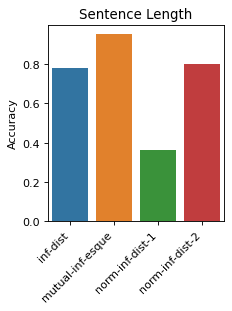

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(3, 4), dpi=80)

df_partition = df_test[df_test["lbltype_name"] == "slen"]
df_partition = df_partition.sort_values("ncd_formula")
sns.barplot(data=df_partition, ax=ax,
            x="ncd_formula", y="acc")

ax.set_title('Sentence Length')
ax.set_xlabel('')
ax.set_ylabel("Accuracy")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

fig.tight_layout()
plt.savefig(GRAPHS + f"jeopardy-slen-ncd-formulae.svg", format="svg", bbox_inches='tight')
plt.show()